In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Smiljanic, Mr. Mile",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
570,571,1,2,"Harris, Mr. George",male,62.00,0,0,S.W./PP 752,10.5000,NaN,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.00,0,1,111361,57.9792,B18,C
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.00,0,0,C.A. 29178,13.0000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
129,130,0,3,"Ekstrom, Mr. Johan",male,45.00,0,0,347061,6.9750,NaN,S


In [6]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Graphs Of People Survived v/s (Gender,Age,Parch)

Percentage of Female Survivors :  74.20382165605095


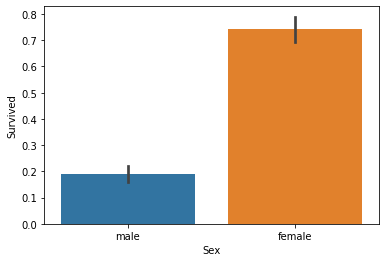

In [7]:
#For Gender
sns.barplot(x="Sex",y="Survived",data=train)
print("Percentage of Female Survivors : ",train["Survived"][train["Sex"]=='female'].value_counts(normalize=True)[1]*100)

Survivors of PClass-1 : 62.96296296296296
Survivors of PClass-2 : 47.28260869565217
Survivors of PClass-3 : 24.236252545824847


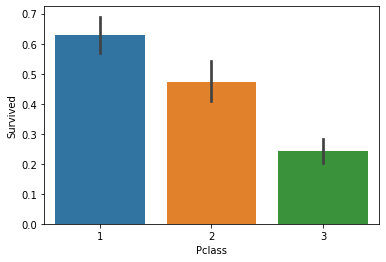

In [8]:
#For PClass
sns.barplot(x="Pclass",y="Survived",data=train)
print("Survivors of PClass-1 :", train["Survived"][train["Pclass"]==1].value_counts(normalize=True)[1]*100)
print("Survivors of PClass-2 :", train["Survived"][train["Pclass"]==2].value_counts(normalize=True)[1]*100)
print("Survivors of PClass-3 :", train["Survived"][train["Pclass"]==3].value_counts(normalize=True)[1]*100)

Survivors of SibSp-0 : 34.53947368421053
Survivors of SibSp-1 : 53.588516746411486
Survivors of SibSp-2 : 46.42857142857143
Survivors of SibSp-3 : 25.0


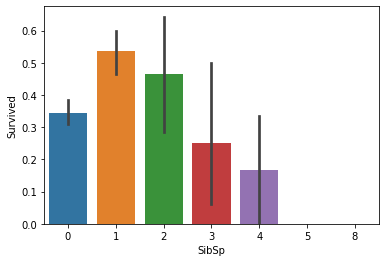

In [9]:
#For SibSp
sns.barplot(x="SibSp",y="Survived",data=train)
print("Survivors of SibSp-0 :", train["Survived"][train["SibSp"]==0].value_counts(normalize=True)[1]*100)
print("Survivors of SibSp-1 :", train["Survived"][train["SibSp"]==1].value_counts(normalize=True)[1]*100)
print("Survivors of SibSp-2 :", train["Survived"][train["SibSp"]==2].value_counts(normalize=True)[1]*100)
print("Survivors of SibSp-3 :", train["Survived"][train["SibSp"]==3].value_counts(normalize=True)[1]*100)

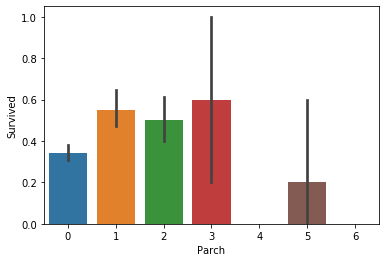

In [10]:
sns.barplot(x="Parch",y="Survived",data = train)

### Cleaning The Age Data

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

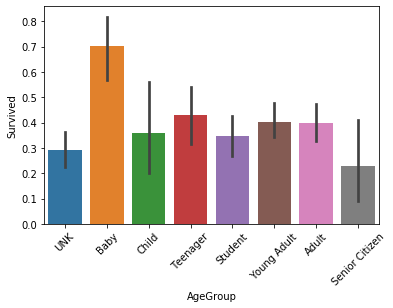

In [12]:
train['Age'] = train['Age'].fillna(-0.5)
test['Age'] = test['Age'].fillna(-0.5)

bins = [-1,0,5,12,18,24,35,60,np.inf]
labels = ['UNK','Baby','Child','Teenager','Student','Young Adult','Adult','Senior Citizen']

train['AgeGroup'] = pd.cut(train['Age'],bins,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bins,labels = labels)

sns.barplot(x='AgeGroup',y="Survived",data = train)
plt.xticks(rotation=45)


# # Cleaning Test/Train Data

In [13]:
train = train.drop(columns = ['Cabin','Ticket'],axis=1)
test = test.drop(columns = ['Cabin','Ticket'],axis=1)

In [14]:
# Check embarking

print("People Embarked in Southhampton (S)")
S = train[train["Embarked"] == "S"].shape[0]
print(S)

print("People Embarked in Cherbourg (C)")
C = train[train["Embarked"] == "C"].shape[0]
print(C)

print("People Embarked in Queenstown (Q)")
Q = train[train["Embarked"] == "Q"].shape[0]
print(Q)

People Embarked in Southhampton (S)
644
People Embarked in Cherbourg (C)
168
People Embarked in Queenstown (Q)
77


In [15]:
train = train.fillna({"Embarked":"S"})

In [16]:
pd.isnull(train).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
AgeGroup       0
dtype: int64

In [17]:
combine = [train,test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand = False)
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Doc','Major','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Sir'],'Royal')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'],'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'],'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Dr,0.428571
1,Master,0.575000
2,Miss,0.702703
3,Mr,0.156673
4,Mrs,0.793651
5,Rare,0.285714
6,Rev,0.000000
7,Royal,1.000000


In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1.0


In [20]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult